In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [348]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [349]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [350]:
import datetime
from datetime import timedelta

In [351]:
df = pd.read_csv('all_auction.csv', encoding = 'utf-8')
df.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
0,2020/12/7,永固一-KY,55461,櫃檯買賣,無擔保轉換公司債,美國標,"6,800",100,1,680,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
1,2020/12/4,信邦七,30237,櫃檯買賣,無擔保轉換公司債,美國標,"11,400",101,1,"1,140",...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
2,2020/12/4,達亞,6762,櫃檯買賣,初上櫃,美國標,"1,660",228.37,1,238,...,0,4.5,0,0,0,0,0,0.0,NaN,NaN
3,2020/12/3,森寶一,34891,櫃檯買賣,有擔保轉換公司債,美國標,900,103,1,90,...,0,0.5,0,0,0,0,0,0.0,NaN,NaN
4,2020/12/2,揚秦,2755,櫃檯買賣,初上櫃,美國標,"1,360",48,1,178,...,0,5.0,0,0,0,0,0,0.0,NaN,NaN


In [352]:
df['開標日期'] = pd.to_datetime(df['開標日期'])
df['開標日期']

0     2020-12-07
1     2020-12-04
2     2020-12-04
3     2020-12-03
4     2020-12-02
         ...    
205   2016-12-05
206   2016-12-07
207   2016-12-14
208   2016-12-16
209   2017-01-03
Name: 開標日期, Length: 210, dtype: datetime64[ns]

In [353]:
df.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)',
       '最低每標單投標數量(張)', '最高投(得)標數量(張)', '保證金成數(%)', '每一投標單投標處理費(元)',
       '撥券日期(上市、上櫃日期)', '主辦券商', '得標總金額(元)', '得標手續費率(%)', '總合格件', '合格投標數量(張)',
       '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '承銷價格(元)', '投標最後一天平均成交價',
       '撥券日開盤價'],
      dtype='object')

In [354]:
df.shape

(210, 24)

In [355]:
df.loc[df['最低得標價格(元)'] != 0, '證券名稱'].value_counts()

聯廣       2
精測       2
泰昇-KY    2
申豐       1
三能-KY    1
        ..
磐儀三      1
信紘       1
宏觀       1
鑫創電子     1
惠特科技     1
Name: 證券名稱, Length: 207, dtype: int64

In [356]:
df[df['證券名稱'] =='精測']

## 兩筆為不同事件都要考慮

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
159,2017-09-18,精測,6510,櫃檯買賣,上櫃增資,美國標,"1,530","1,267.33",1,153,...,"1,772,575,830",1.0,216,"1,381","1,267.33","1,320","1,283.55",1267.33,1330.00,1250.0
185,2016-03-10,精測,6510,櫃檯買賣,初上櫃,美國標,1896,300,3,236,...,854748380,2.5,"2,667","17,457",440.2,482,450.82,360.00,478.18,590.0


In [357]:
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5
209,2017-01-03,泰昇-KY,8480,集中市場,第一上市初上市,美國標,3400,82.31,2,425,...,0,2.5,NaN,NaN,0,0,0,0.0,NaN,NaN


In [358]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,"381,534,290",2.5,"1,066","12,763",110.22,124,112.22,107.0,NaN,114.5


In [359]:
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN
145,2018-01-08,聯廣,8497,集中交易市場,初上市,美國標,"4,680",47.3,1,672,...,0,4.0,500,"4,308",0,0,0,0.0,70.77,NaN


In [360]:
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標總金額(元),得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,"229,545,830",4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標) 

In [361]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)

In [362]:
df.shape

(199, 24)

In [363]:
df[df['得標總金額(元)'] == '0']['證券名稱']

Series([], Name: 證券名稱, dtype: object)

* 羅麗芬-ky, 聯廣, 泰福-ky 流標
* 其餘則是還在進行中 (資料取自2020.11.27)

In [364]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock"       

In [365]:
df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)
sum(df['類別'] == 'cb')

26

In [366]:
df['類別']

7      stock
8      stock
9         cb
10     stock
11     stock
       ...  
204    stock
205    stock
206    stock
207    stock
208    stock
Name: 類別, Length: 199, dtype: object

## 好奇每個時間投標熱度有沒有差

In [367]:
df_time = df[['開標日期','證券名稱','證券代號','類別','競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)','最高得標價格(元)', '得標加權平均價格(元)','投標最後一天平均成交價','總合格件', '合格投標數量(張)']]

In [368]:
df_time.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
類別                       object
競拍數量(張)                  object
最低投標價格(元)                object
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)                object
最高得標價格(元)                object
得標加權平均價格(元)              object
投標最後一天平均成交價             float64
總合格件                     object
合格投標數量(張)                object
dtype: object

In [369]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '總合格件', '合格投標數量(張)']
for col in obj_col:
    df_time[col] = df_time[col].apply(lambda x: x.replace(',', '')) 
    df_time[col] = df_time[col].apply(pd.to_numeric, errors = 'coerce')

In [370]:
df_time['總投標金額'] = df_time['得標加權平均價格(元)'] * df_time['合格投標數量(張)']
df_time['最低得標相對底標漲幅'] = df_time['最低得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['加權得標相對底標漲幅'] = df_time['得標加權平均價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['最高得標相對底標漲幅'] = df_time['最高得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
df_time['投標競爭度'] = df_time['合格投標數量(張)'] / df_time['競拍數量(張)']
df_time['每標平均張數'] = df_time['合格投標數量(張)'] / df_time['總合格件']

In [371]:
df_time.index = df_time['開標日期']

Text(0.5, 1.0, '最高得標相對底標漲幅(%)')

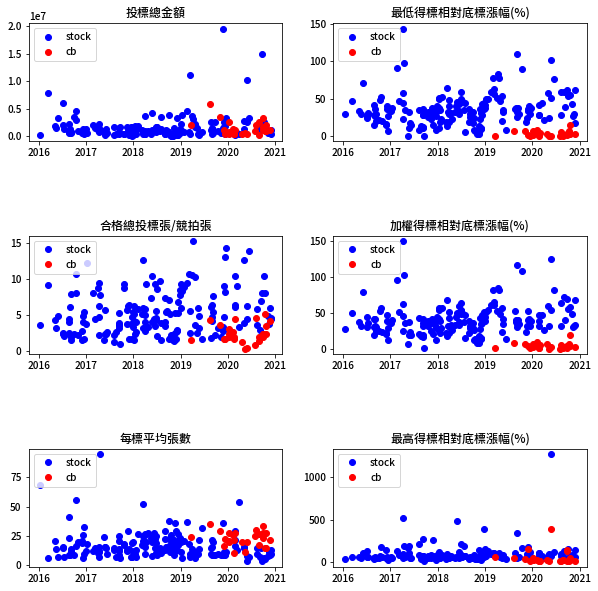

In [372]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10))
plt.subplots_adjust(hspace = 0.8)
ax[0,0].plot(df_time[df_time['類別'] == 'stock']['總投標金額'], 'bo')
ax[0,0].plot(df_time[df_time['類別'] == 'cb']['總投標金額'], 'ro')
ax[0,0].legend(['stock', 'cb'], loc = 2)
ax[0,0].set_title('投標總金額')

ax[1,0].plot(df_time[df_time['類別'] == 'stock']['投標競爭度'], 'bo')
ax[1,0].plot(df_time[df_time['類別'] == 'cb']['投標競爭度'], 'ro')
ax[1,0].legend(['stock', 'cb'], loc = 2)
ax[1,0].set_title('合格總投標張/競拍張')

ax[2,0].plot(df_time[df_time['類別'] == 'stock']['每標平均張數'], 'bo')
ax[2,0].plot(df_time[df_time['類別'] == 'cb']['每標平均張數'], 'ro')
ax[2,0].legend(['stock', 'cb'], loc = 2)
ax[2,0].set_title('每標平均張數')

ax[0,1].plot(df_time[df_time['類別'] == 'stock']['最低得標相對底標漲幅'], 'bo')
ax[0,1].plot(df_time[df_time['類別'] == 'cb']['最低得標相對底標漲幅'], 'ro')
ax[0,1].legend(['stock', 'cb'], loc = 2)
ax[0,1].set_title('最低得標相對底標漲幅(%)')

ax[1,1].plot(df_time[df_time['類別'] == 'stock']['加權得標相對底標漲幅'], 'bo')
ax[1,1].plot(df_time[df_time['類別'] == 'cb']['加權得標相對底標漲幅'], 'ro')
ax[1,1].legend(['stock', 'cb'], loc = 2)
ax[1,1].set_title('加權得標相對底標漲幅(%)')

ax[2,1].plot(df_time[df_time['類別'] == 'stock']['最高得標相對底標漲幅'], 'bo')
ax[2,1].plot(df_time[df_time['類別'] == 'cb']['最高得標相對底標漲幅'], 'ro')
ax[2,1].legend(['stock', 'cb'], loc = 2)
ax[2,1].set_title('最高得標相對底標漲幅(%)')

## 近兩年有四檔投標金額異常高：

In [373]:
df_time[['證券名稱','總投標金額']].sort_values(by = ['總投標金額'] ,ascending = False).head(4)

,證券名稱,總投標金額
開標日期,,
2019-11-25,和潤企業,19511129.54
2020-09-23,汎德永業,14825916.30
2019-03-13,緯穎,11033970.84
2020-05-25,昇佳電子,10149612.66


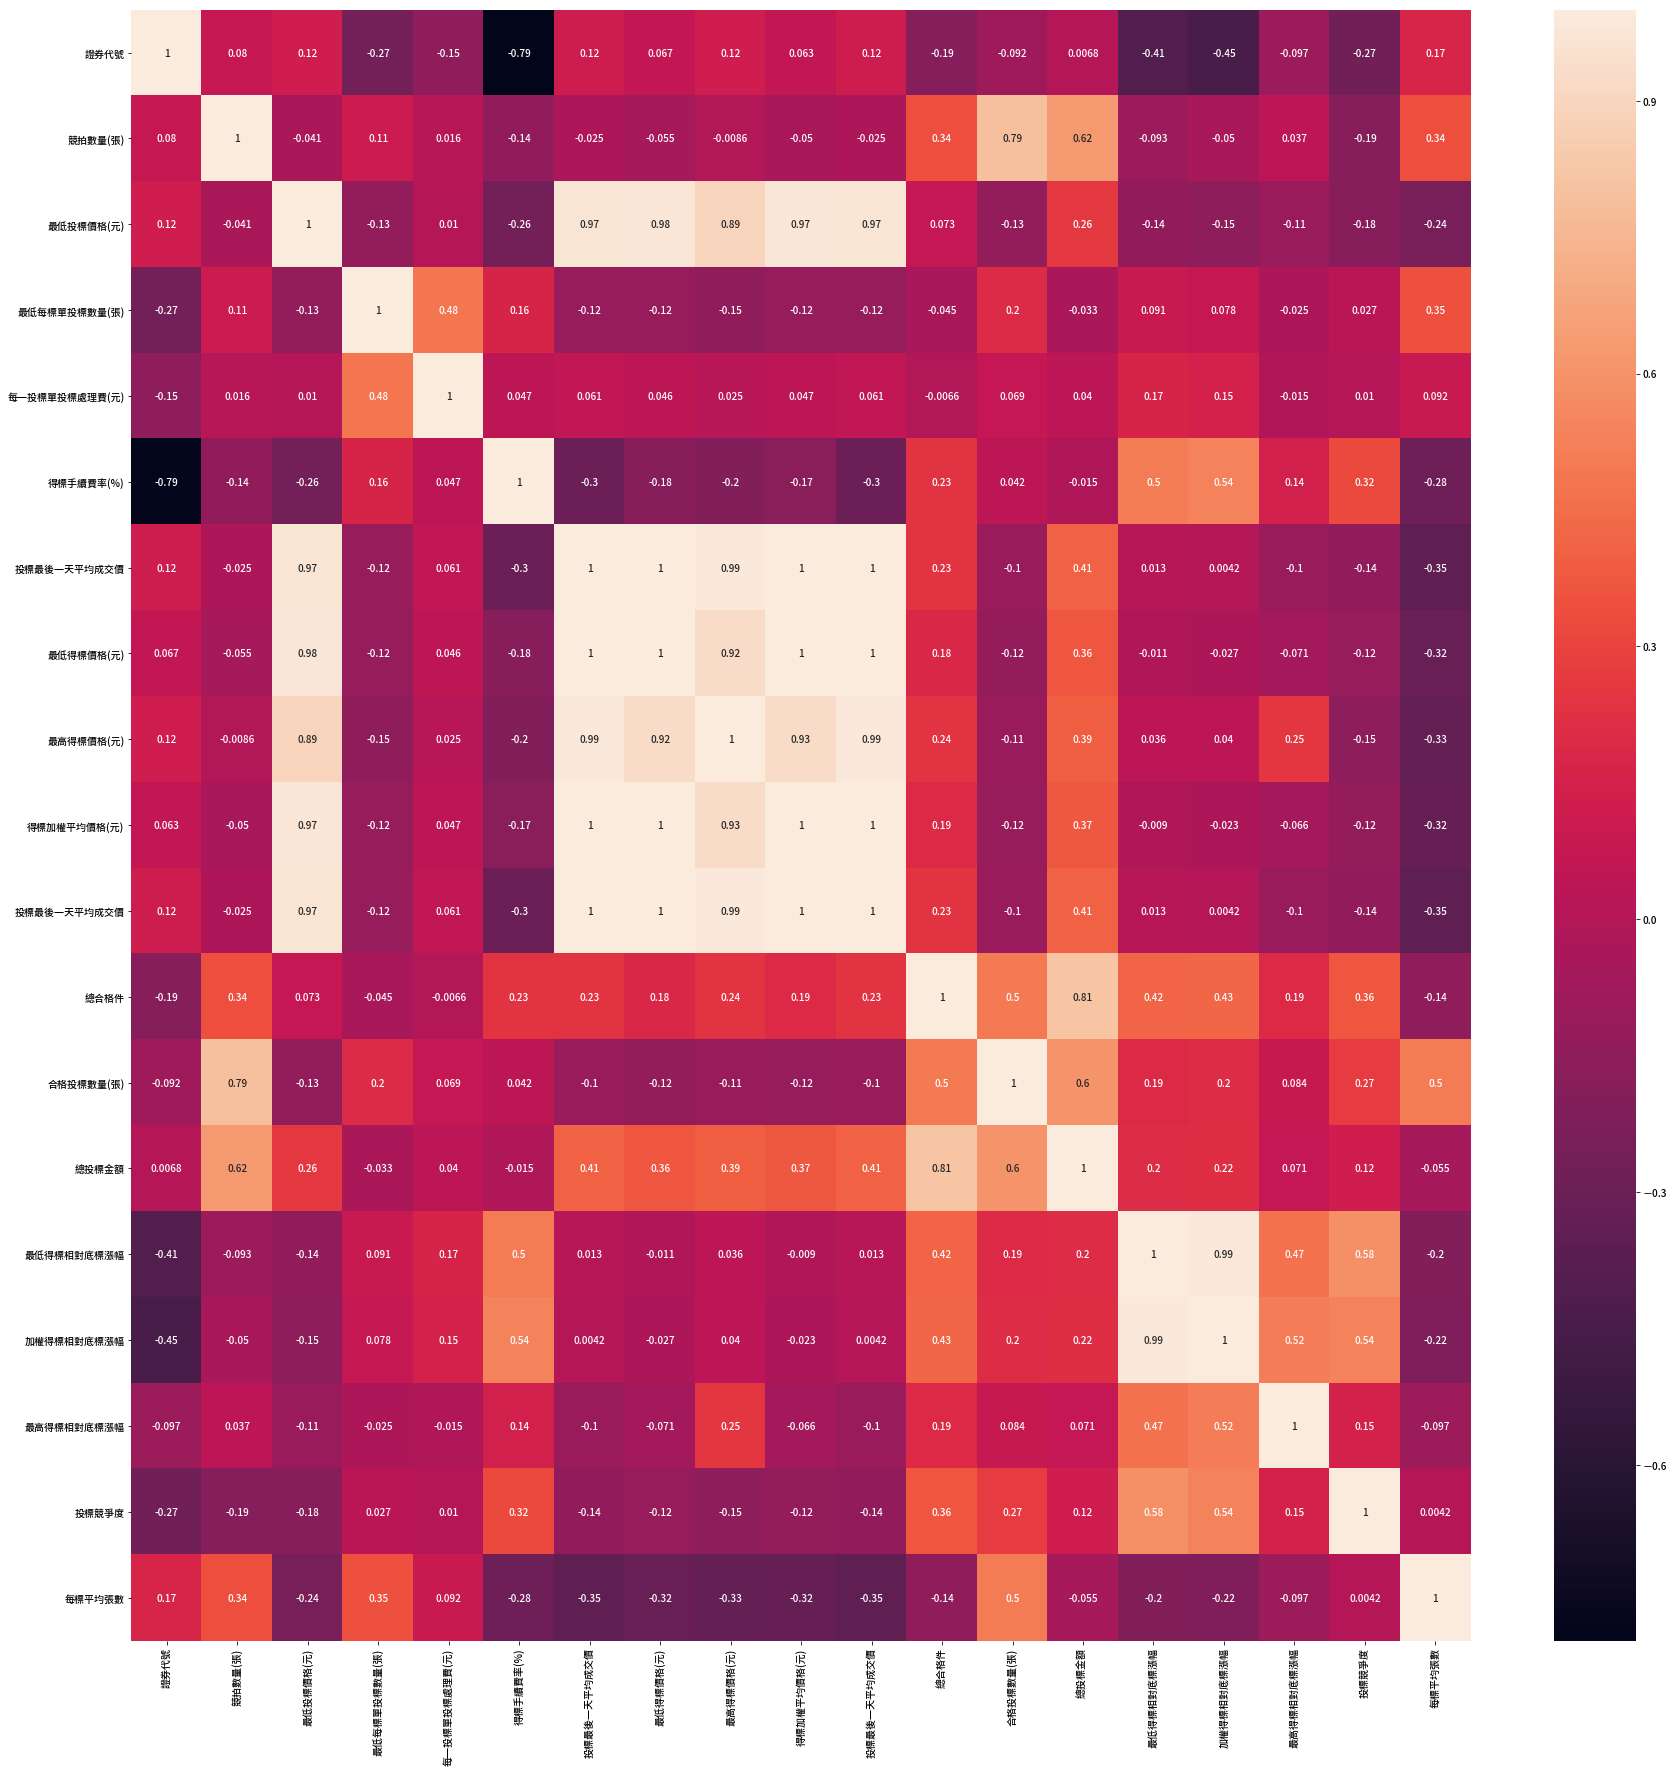

In [374]:
plt.figure(figsize=(30, 30))
corrMatrix = df_time.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

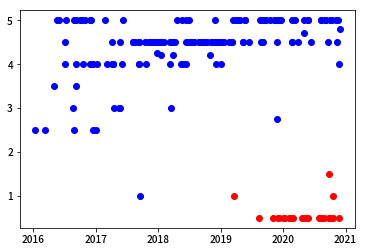

In [375]:
plt.plot(df_time[df_time['類別'] == 'stock']['得標手續費率(%)'], 'bo', )
plt.plot(df_time[df_time['類別'] == 'cb']['得標手續費率(%)'], 'ro', )

## 將df只選出開標前知道的資訊 + 最低得標價(Y)

In [376]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)','類別', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)']]
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,"3,740",stock,42.59,1,400,4.8,80.84,68.6
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,"1,800",stock,50,1,400,4.0,67.49,58.51
9,2020-11-23,台驊四,26364,櫃檯買賣,無擔保轉換公司債,"2,550",cb,102,1,400,0.5,NaN,104.2
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,"2,005",stock,48,1,400,5.0,68.97,62.4
11,2020-11-10,八貫,1342,集中交易市場,初上市,"4,234",stock,50,1,400,4.5,76.48,63.6


In [377]:
df_1.shape

(199, 13)

In [378]:
df_1['發行性質'].value_counts()

初上櫃         90
初上市         57
第一上市初上市     20
無擔保轉換公司債    18
有擔保轉換公司債     8
第一上櫃初上櫃      5
上櫃增資         1
Name: 發行性質, dtype: int64

In [379]:
df1_stock = df_1[df_1['類別'] == 'stock']
df1_cb = df_1[df_1['類別'] == 'cb']

In [380]:
print('股票',df1_stock.shape[0],'可轉債', df1_cb.shape[0])

股票 173 可轉債 26


## 檢查缺失值 把股票和可轉債分開看


In [381]:
df1_stock.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
類別                0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      25
最低得標價格(元)         0
dtype: int64

In [382]:
df1_cb.isnull().apply(lambda x: sum(x))

開標日期              0
證券名稱              0
證券代號              0
發行市場              0
發行性質              0
競拍數量(張)           0
類別                0
最低投標價格(元)         0
最低每標單投標數量(張)      0
每一投標單投標處理費(元)     0
得標手續費率(%)         0
投標最後一天平均成交價      26
最低得標價格(元)         0
dtype: int64

In [383]:
df1_stock.dropna(inplace = True)
df1_stock.shape

(148, 13)

In [384]:
df1_stock.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
類別               0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [385]:
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                  object
類別                       object
最低投標價格(元)                object
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)                object
dtype: object

In [386]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df1_stock[col] = df1_stock[col].apply(lambda x: x.replace(',', '')) 
    df1_stock[col] = df1_stock[col].apply(pd.to_numeric, errors = 'coerce')

df1_stock.isnull().apply(lambda x: sum(x))

開標日期             0
證券名稱             0
證券代號             0
發行市場             0
發行性質             0
競拍數量(張)          0
類別               0
最低投標價格(元)        0
最低每標單投標數量(張)     0
每一投標單投標處理費(元)    0
得標手續費率(%)        0
投標最後一天平均成交價      0
最低得標價格(元)        0
dtype: int64

In [387]:
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                   int64
類別                       object
最低投標價格(元)               float64
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)               float64
dtype: object

## 來畫相關係數圖!!!

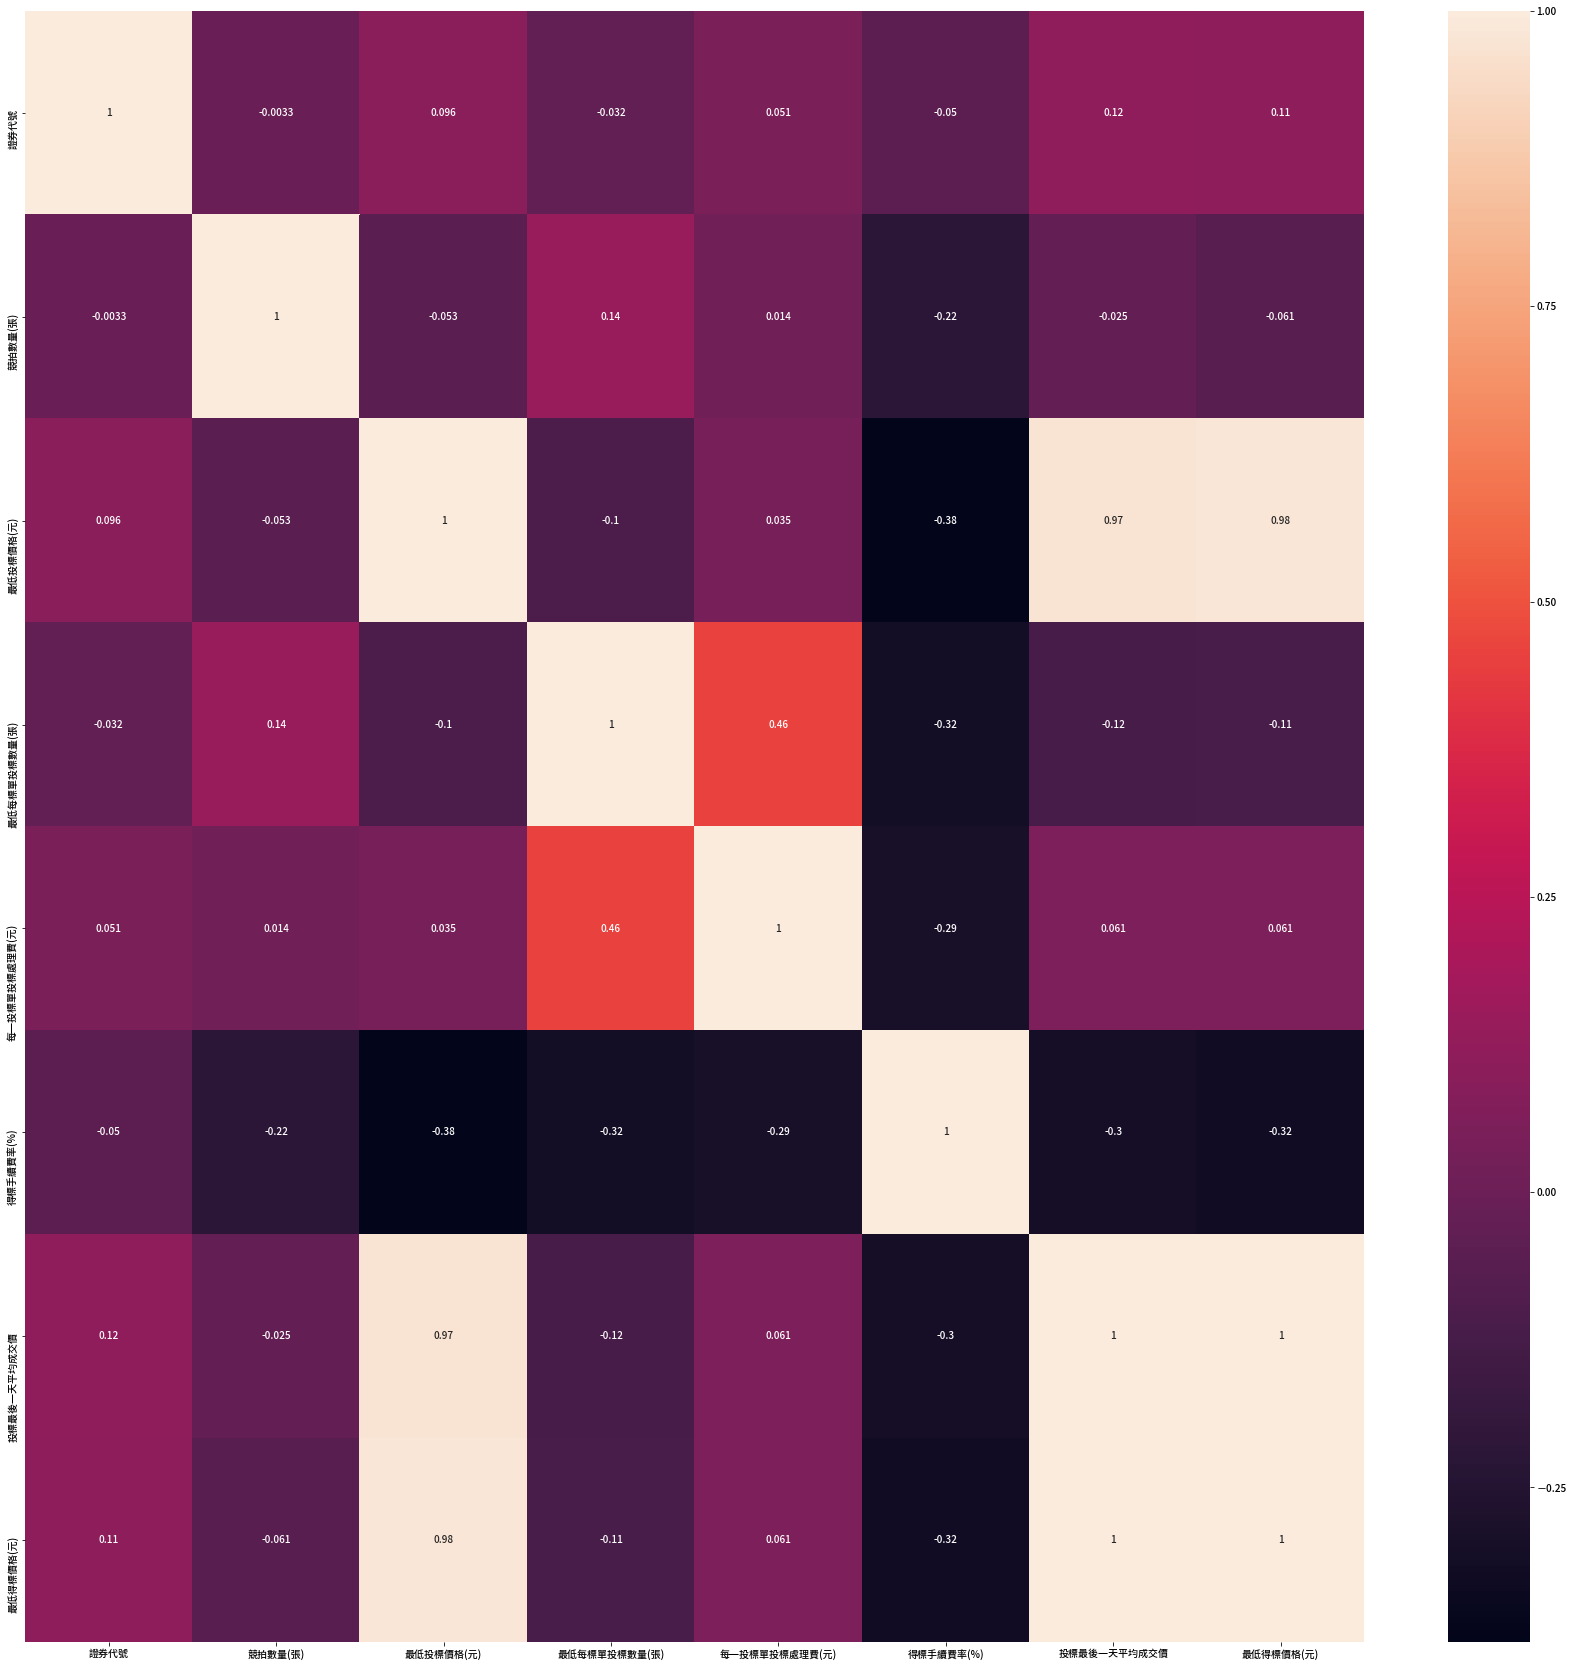

In [306]:
plt.figure(figsize=(30, 30))
corrMatrix = df1_stock.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


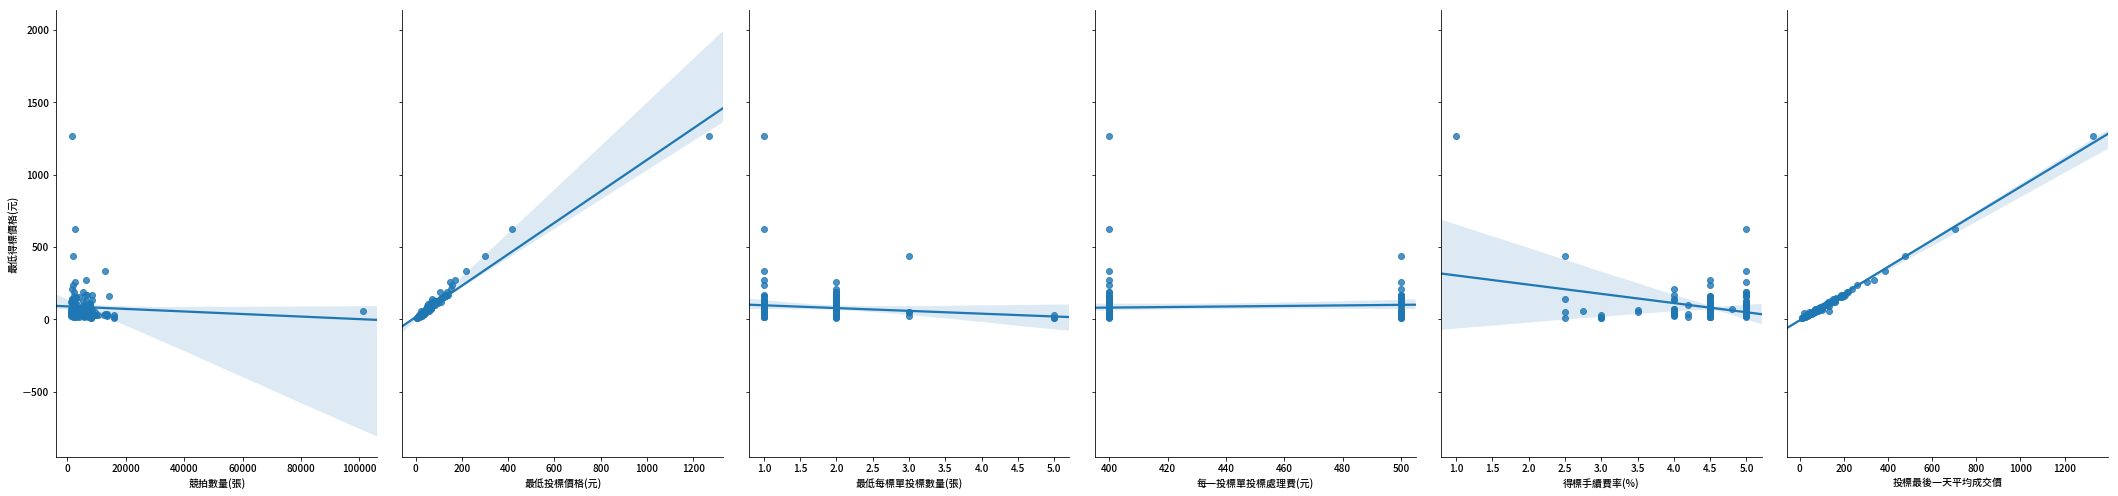

In [307]:
sn.pairplot(df1_stock, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')


## 發現最低投標價12多多那筆是outlier

In [308]:
outlier = df1_stock['最低投標價格(元)'] > 1200
df1_stock[outlier]

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
159,2017-09-18,精測,6510,櫃檯買賣,上櫃增資,1530,stock,1267.33,1,400,1.0,1330.0,1267.33


In [309]:
index = df1_stock[outlier].index
df1_stock.drop(index, inplace = True)

In [310]:
index = df1_stock[df1_stock['發行性質']=='第一上市初上市'].index
df1_stock.drop(index, inplace = True)

C:\Users\hello\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


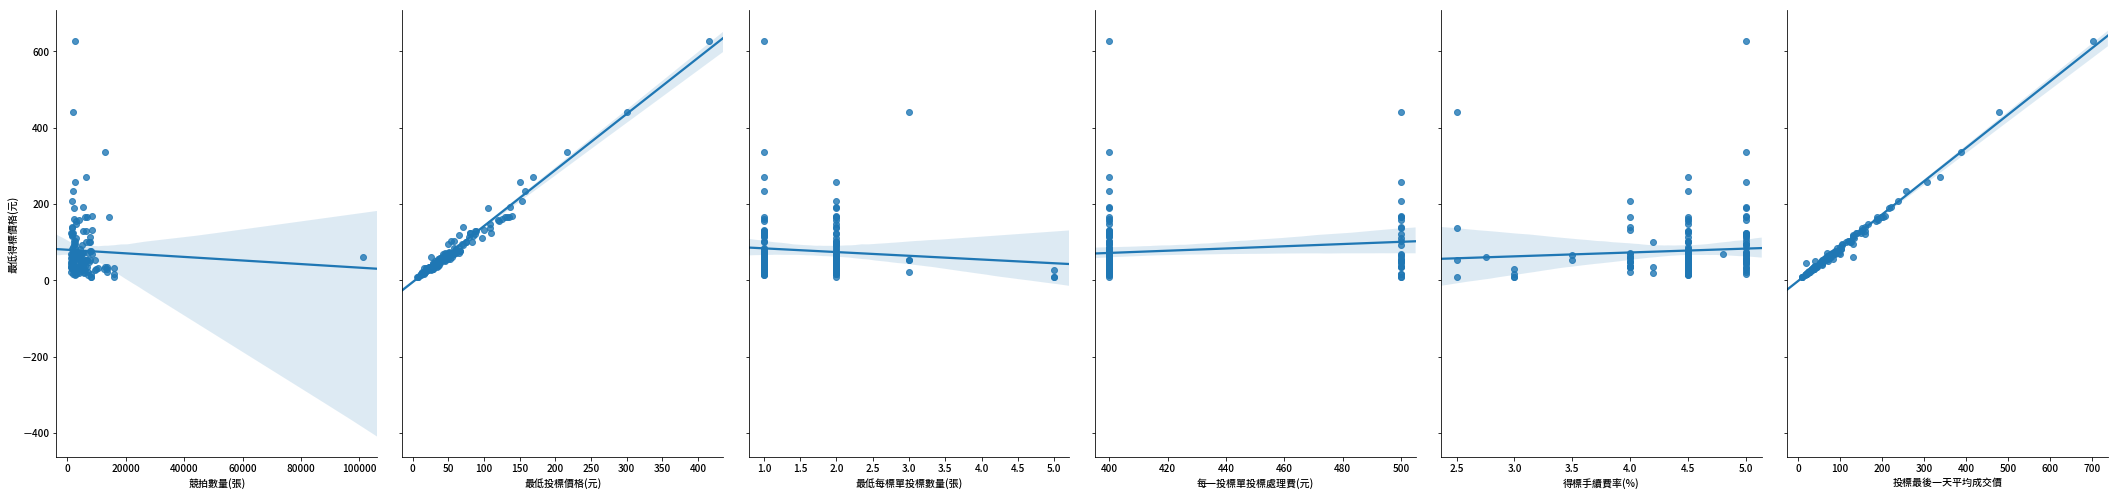

In [311]:
sn.pairplot(df1_stock, x_vars=['競拍數量(張)','最低投標價格(元)','最低每標單投標數量(張)','每一投標單投標處理費(元)','得標手續費率(%)','投標最後一天平均成交價'], y_vars='最低得標價格(元)', size=7, aspect=0.7, kind='reg')

## 將 最低每標單投標數量(張), 每一投標單投標處理費(元), 得標手續費率(%) 轉成類別資料

In [312]:
dummies = pd.get_dummies(df1_stock['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
dummies.head()

,最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5
7,1,0,0,0
8,1,0,0,0
10,1,0,0,0
11,1,0,0,0
12,1,0,0,0


In [313]:
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['最低每標單投標數量(張)'], axis = 1, inplace = True)
df1_stock.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,3740,stock,42.59,400,4.8,80.84,68.60,1,0,0,0
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,1800,stock,50.00,400,4.0,67.49,58.51,1,0,0,0
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,2005,stock,48.00,400,5.0,68.97,62.40,1,0,0,0
11,2020-11-10,八貫,1342,集中交易市場,初上市,4234,stock,50.00,400,4.5,76.48,63.60,1,0,0,0
12,2020-11-06,陞達科技,4945,櫃檯買賣,初上櫃,2244,stock,34.86,400,5.0,40.32,49.90,1,0,0,0


In [314]:
dummies = pd.get_dummies(df1_stock['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['每一投標單投標處理費(元)'], axis = 1, inplace = True)
df1_stock.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元),最低每標單投_1,最低每標單投_2,最低每標單投_3,最低每標單投_5,處理費_400,處理費_500
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,3740,stock,42.59,4.8,80.84,68.60,1,0,0,0,1,0
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,1800,stock,50.00,4.0,67.49,58.51,1,0,0,0,1,0
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,2005,stock,48.00,5.0,68.97,62.40,1,0,0,0,1,0
11,2020-11-10,八貫,1342,集中交易市場,初上市,4234,stock,50.00,4.5,76.48,63.60,1,0,0,0,1,0
12,2020-11-06,陞達科技,4945,櫃檯買賣,初上櫃,2244,stock,34.86,5.0,40.32,49.90,1,0,0,0,1,0


In [315]:
dummies = pd.get_dummies(df1_stock['得標手續費率(%)'])
dummies.columns = ['手續費_2.5', '手續費_2.75', '手續費_3', '手續費_3.5', '手續費_4', '手續費_4.2', '手續費_4.5', '手續費_4.8', '手續費_5']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['得標手續費率(%)'], axis = 1, inplace = True)

In [316]:
dummies = pd.get_dummies(df1_stock['發行性質'])
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
df1_stock.drop(['發行性質'], axis = 1, inplace = True)

In [317]:
df1_stock.shape

(146, 26)

In [318]:
df1_stock.drop(['開標日期', '證券名稱', '證券代號', '發行市場','類別'], axis = 1, inplace = True)

In [319]:
## 除了類別資料 都套上scaler
#sclaler = MinMaxScaler()
#num_vars = ['競拍數量(張)', '最低投標價格(元)', '投標最後一天平均成交價', '最低得標價格(元)']
#df1_stock[num_vars] = sclaler.fit_transform(df1_stock[num_vars])
#df1_stock.head()

In [320]:
# split into train and test
df_train, df_test = train_test_split(df1_stock, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

102
44


In [321]:
y_train = df_train.pop('最低得標價格(元)')
x_train = df_train.drop(['最低每標單投_1', '處理費_400', '手續費_2.75', '初上市'], axis = 1) 

In [322]:
y_train.shape, x_train.shape

((102,), (102, 16))

In [323]:
x_train_lm = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_lm).fit()
lr_1.summary()
## AIC 654.9, BIC 696.9, adjr2 0.996

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1559.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           6.58e-98
Time:                        18:54:26   Log-Likelihood:                -311.45
No. Observations:                 102   AIC:                             654.9
Df Residuals:                      86   BIC:                             696.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.7848      1.936     -1.438      0.154      -6.633       1.064
競拍數量(張)         0.0001      0.000      0.562      0.576      -0.000       0.001
最低投標價格(元)       0.2038      0.072      2.841      0.006       0.061       0.346
投標最後一天平均成交價     0.7568      0.043     17.692      0.000       0.672       0.842
最低每標單投_2       -1.1693      1.407     -0.831      0.408      -3.967       1.628
最低每標單投_3        5.9702      4.631      1.289      0.201      -3.235      15.176
最低每標單投_5        0.6832      3.970      0.172      0.864      -7.210       8.576
處理費_500        -3.2112      2.122     -1.513      0.134      -7.429       1.007
手續費_2.5         5.9587      3.343      1.782      0.078      -0.688      12.605
手續費_3           1.2141      2.971      0.409      0.684      -4.692       7.120
手續費_3.5         2.0783      5.277      0.394      0.695      -8.413      12.570
手續費_4          -0.7148      1.924     -0.372      0.711      -4.540       3.110
手續費_4.2        -6.7104      5.265     -1.274      0.206     -17.178       3.757
手續費_4.5        -3.4430      1.617     -2.129      0.036      -6.658      -0.228
手續費_4.8         1.0900      5.208      0.209      0.835      -9.263      11.442
手續費_5          -2.2575      1.700     -1.328      0.188      -5.637       1.122
初上櫃             3.6218      1.432      2.529      0.013       0.774       6.469
==============================================================================
Omnibus:                        4.774   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.300
Skew:                          -0.368   Prob(JB):                        0.117
Kurtosis:                       3.687   Cond. No.                     9.81e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.8e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [342]:
## 主軸1: 投標最後一天平均成交價, 搭配刪除p-value > 0.2的變數
x = x_train[['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃']]
x_lm2 = sm.add_constant(x)
lm2 = sm.OLS(y_train, x_lm2).fit()
lm2.summary() 
## AIC 651.9, BIC 670.3, adjr2 0.995

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3715.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          2.49e-110
Time:                        19:12:05   Log-Likelihood:                -318.95
No. Observations:                 102   AIC:                             651.9
Df Residuals:                      95   BIC:                             670.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.3867      1.766     -1.351      0.180      -5.893       1.120
投標最後一天平均成交價     0.8774      0.006    138.862      0.000       0.865       0.890
處理費_500        -3.4160      1.837     -1.860      0.066      -7.063       0.231
手續費_2.5         9.7744      3.282      2.978      0.004       3.258      16.290
手續費_4.5        -3.2731      1.791     -1.827      0.071      -6.829       0.283
手續費_5          -2.3131      1.880     -1.231      0.222      -6.045       1.419
初上櫃             3.4508      1.197      2.882      0.005       1.074       5.828
==============================================================================
Omnibus:                       11.012   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               17.428
Skew:                          -0.455   Prob(JB):                     0.000164
Kurtosis:                       4.809   Cond. No.                         796.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
## 剔除 手續費_5 (p_value))
x = x_train[['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '初上櫃']]
x_lm3 = sm.add_constant(x)
lm3 = sm.OLS(y_train, x_lm3).fit()
lm3.summary()
## AIC 651.5, BIC 667.3, adjr2 0.995

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4434.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          7.52e-112
Time:                        19:13:59   Log-Likelihood:                -319.76
No. Observations:                 102   AIC:                             651.5
Df Residuals:                      96   BIC:                             667.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.7511      1.378     -2.721      0.008      -6.487      -1.015
投標最後一天平均成交價     0.8755      0.006    142.392      0.000       0.863       0.888
處理費_500        -2.5644      1.706     -1.503      0.136      -5.951       0.822
手續費_2.5        10.6634      3.210      3.322      0.001       4.291      17.036
手續費_4.5        -1.7505      1.299     -1.348      0.181      -4.328       0.827
初上櫃             3.3873      1.199      2.824      0.006       1.006       5.768
==============================================================================
Omnibus:                       12.685   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.214
Skew:                          -0.535   Prob(JB):                     4.08e-05
Kurtosis:                       4.900   Cond. No.                         765.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [346]:
## 剔除 處理費_500, 手續費_4.5(p-value)
x = x_train[['投標最後一天平均成交價', '手續費_2.5', '初上櫃']]
x_lm4 = sm.add_constant(x)
lm4 = sm.OLS(y_train, x_lm4).fit()
lm4.summary()
## AIC 650, BIC 661, adjR2 0.995

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     7323.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          4.25e-115
Time:                        19:21:44   Log-Likelihood:                -321.27
No. Observations:                 102   AIC:                             650.5
Df Residuals:                      98   BIC:                             661.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.0919      1.046     -4.867      0.000      -7.168      -3.015
投標最後一天平均成交價     0.8759      0.006    143.681      0.000       0.864       0.888
手續費_2.5         9.4466      2.986      3.164      0.002       3.522      15.372
初上櫃             3.2724      1.197      2.733      0.007       0.896       5.648
==============================================================================
Omnibus:                       13.932   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.029
Skew:                          -0.539   Prob(JB):                     3.67e-06
Kurtosis:                       5.175   Cond. No.                         693.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 計算VIF 看有沒有multicollinearity

In [324]:
vif1 = pd.DataFrame()
vif1['features'] = x_train.columns
vif1["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
1,最低投標價格(元),55.09
2,投標最後一天平均成交價,54.98
12,手續費_4.5,6.13
14,手續費_5,3.66
10,手續費_4,2.48
6,處理費_500,2.41
7,手續費_2.5,2.13
0,競拍數量(張),1.80
8,手續費_3,1.79
3,最低每標單投_2,1.61


## 只有 VIF很高的那兩個變數有共線性問題
## 其餘的變數搭配p-value 及 AIC BIC ADJ-R^2 來選擇模型

In [325]:
x_train2 = x_train[['最低投標價格(元)','投標最後一天平均成交價','競拍數量(張)']]
x_train2_lm = sm.add_constant(x_train2)
lr_2 = sm.OLS(y_train, x_train2_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6948.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          5.51e-114
Time:                        18:54:26   Log-Likelihood:                -323.94
No. Observations:                 102   AIC:                             655.9
Df Residuals:                      98   BIC:                             666.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.5729      1.215     -2.118      0.037      -4.983      -0.163
最低投標價格(元)       0.2354      0.072      3.270      0.001       0.093       0.378
投標最後一天平均成交價     0.7411      0.043     17.236      0.000       0.656       0.826
競拍數量(張)        -0.0002      0.000     -1.182      0.240      -0.001       0.000
==============================================================================
Omnibus:                        6.347   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.860
Skew:                          -0.300   Prob(JB):                       0.0196
Kurtosis:                       4.220   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
vif2 = pd.DataFrame()
vif2['features'] = x_train2.columns
vif2["VIF"] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
0,最低投標價格(元),95.70
1,投標最後一天平均成交價,94.49
2,競拍數量(張),1.31


In [327]:
x_train3 = x_train[['投標最後一天平均成交價','競拍數量(張)']]
x_train3_lm = sm.add_constant(x_train3)
lr_3 = sm.OLS(y_train, x_train3_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9487.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          7.99e-114
Time:                        18:54:27   Log-Likelihood:                -329.22
No. Observations:                 102   AIC:                             664.4
Df Residuals:                      99   BIC:                             672.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1235      1.265     -1.679      0.096      -4.633       0.386
投標最後一天平均成交價     0.8802      0.007    135.195      0.000       0.867       0.893
競拍數量(張)        -0.0002      0.000     -1.091      0.278      -0.001       0.000
==============================================================================
Omnibus:                       16.667   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.834
Skew:                          -0.455   Prob(JB):                     6.76e-11
Kurtosis:                       6.192   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [328]:
vif3 = pd.DataFrame()
vif3['features'] = x_train3.columns
vif3["VIF"] = [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

,features,VIF
0,投標最後一天平均成交價,1.29
1,競拍數量(張),1.29


In [329]:
x_train4 = x_train[['最低投標價格(元)','競拍數量(張)']]
x_train4_lm = sm.add_constant(x_train4)
lr_4 = sm.OLS(y_train, x_train4_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2574.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           4.42e-86
Time:                        18:54:27   Log-Likelihood:                -395.03
No. Observations:                 102   AIC:                             796.1
Df Residuals:                      99   BIC:                             803.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1409      2.426     -1.295      0.198      -7.954       1.672
最低投標價格(元)      1.4634      0.021     70.405      0.000       1.422       1.505
競拍數量(張)       -0.0003      0.000     -0.924      0.358      -0.001       0.000
==============================================================================
Omnibus:                        8.051   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               13.743
Skew:                           0.237   Prob(JB):                      0.00104
Kurtosis:                       4.735   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [330]:
vif4 = pd.DataFrame()
vif4['features'] = x_train4.columns
vif4["VIF"] = [variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4

,features,VIF
0,最低投標價格(元),1.3
1,競拍數量(張),1.3


In [331]:
vif_summary = pd.merge(vif1, vif2, on = 'features', how = 'outer')
vif_summary = pd.merge(vif_summary, vif3, on = 'features', how = 'outer')
vif_summary = pd.merge(vif_summary, vif4, on = 'features', how = 'outer')
vif_summary.columns = ['features', 'lr1', 'lr2', 'lr3', 'lr4']
vif_summary

,features,lr1,lr2,lr3,lr4
0,最低投標價格(元),55.09,95.70,NaN,1.3
1,投標最後一天平均成交價,54.98,94.49,1.29,NaN
2,手續費_4.5,6.13,NaN,NaN,NaN
3,手續費_5,3.66,NaN,NaN,NaN
4,手續費_4,2.48,NaN,NaN,NaN
5,處理費_500,2.41,NaN,NaN,NaN
6,手續費_2.5,2.13,NaN,NaN,NaN
7,競拍數量(張),1.80,1.31,1.29,1.3
8,手續費_3,1.79,NaN,NaN,NaN
9,最低每標單投_2,1.61,NaN,NaN,NaN


In [332]:
x_train5 = x_train[['最低投標價格(元)']]
x_train5_lm = sm.add_constant(x_train5)
lr_5 = sm.OLS(y_train, x_train5_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5155.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           7.50e-88
Time:                        18:54:27   Log-Likelihood:                -395.47
No. Observations:                 102   AIC:                             794.9
Df Residuals:                     100   BIC:                             800.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7955      1.635     -2.933      0.004      -8.040      -1.551
最低投標價格(元)      1.4668      0.020     71.800      0.000       1.426       1.507
==============================================================================
Omnibus:                        8.260   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               14.150
Skew:                           0.250   Prob(JB):                     0.000846
Kurtosis:                       4.755   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
x_train6 = x_train[['投標最後一天平均成交價']]
x_train6_lm = sm.add_constant(x_train6)
lr_6 = sm.OLS(y_train, x_train6_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.894e+04
Date:                Sun, 13 Dec 2020   Prob (F-statistic):          8.35e-116
Time:                        18:54:27   Log-Likelihood:                -329.83
No. Observations:                 102   AIC:                             663.7
Df Residuals:                     100   BIC:                             668.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1477      0.848     -3.712      0.000      -4.830      -1.465
投標最後一天平均成交價     0.8815      0.006    137.613      0.000       0.869       0.894
==============================================================================
Omnibus:                       18.021   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.330
Skew:                          -0.502   Prob(JB):                     4.33e-12
Kurtosis:                       6.362   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 小結：從模型3, 4, 5, 6中選一個

## 殘差分析
### error terms = y_actual - y_predicted

Text(0.5, 1.0, 'lr_6')

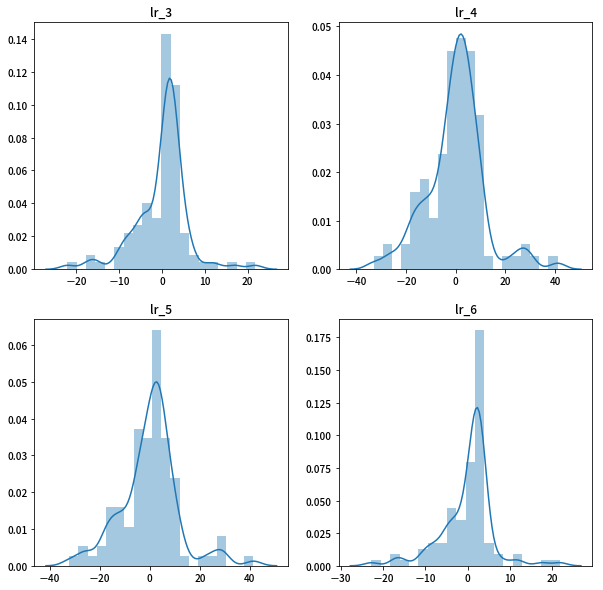

In [334]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
y_pred3 = lr_3.predict(x_train3_lm)
sn.distplot((y_train - y_pred3),bins = 20)
plt.title('lr_3')

plt.subplot(2,2,2)
y_pred4 = lr_4.predict(x_train4_lm)
sn.distplot((y_train - y_pred4),bins = 20)
plt.title('lr_4')

plt.subplot(2,2,3)
y_pred5 = lr_5.predict(x_train5_lm)
sn.distplot((y_train - y_pred5),bins = 20)
plt.title('lr_5')

plt.subplot(2,2,4)
y_pred6 = lr_6.predict(x_train6_lm)
sn.distplot((y_train - y_pred6),bins = 20)
plt.title('lr_6')

In [335]:
data = {'train_y' : y_train, 'pred_y3' : y_pred3, 'pred_y4' : y_pred4, 'pred_y5' : y_pred5, 'pred_y6' : y_pred6}
train_pred_df = pd.DataFrame(data)
train_pred_df.head()

,train_y,pred_y3,pred_y4,pred_y5,pred_y6
100,55.00,70.348305,71.692515,71.479383,70.214274
165,123.44,130.342308,156.537104,155.675085,129.771300
207,138.21,131.155728,155.608073,154.794991,130.617581
36,58.88,54.821386,50.602396,50.210434,54.584522
129,28.70,26.209128,28.083436,27.474661,25.828599


In [336]:
train_pred_df['res_3'] = train_pred_df['train_y'] - train_pred_df['pred_y3']
train_pred_df['res_4'] = train_pred_df['train_y'] - train_pred_df['pred_y4']
train_pred_df['res_5'] = train_pred_df['train_y'] - train_pred_df['pred_y5']
train_pred_df['res_6'] = train_pred_df['train_y'] - train_pred_df['pred_y6']

## 符合常態的資料應該長這樣

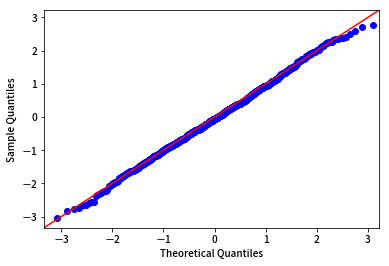

In [337]:
np.random.seed(0)
data = np.random.normal(0,1, 1000)
fig = sm.qqplot(data, line='45')

Text(0.5, 1.0, 'lr_6')

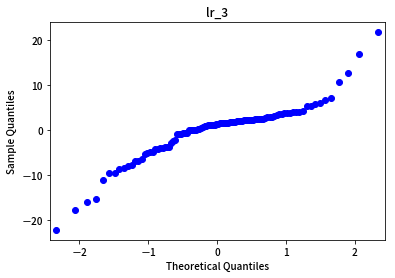

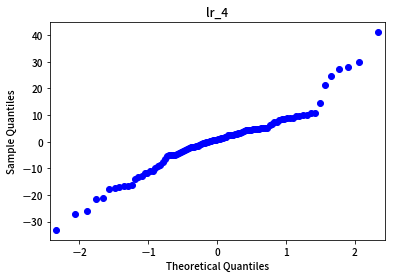

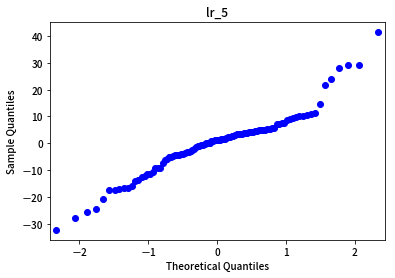

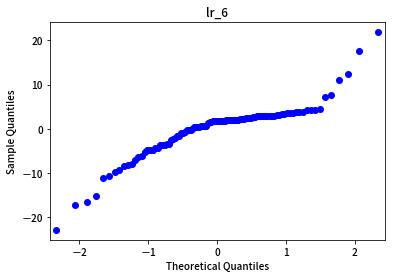

In [338]:
res_3 = train_pred_df['res_3'].to_numpy()
fig = sm.qqplot(res_3)
plt.title('lr_3')

res_4 = train_pred_df['res_4'].to_numpy()
fig = sm.qqplot(res_4)
plt.title('lr_4')

res_5 = train_pred_df['res_5'].to_numpy()
fig = sm.qqplot(res_5)
plt.title('lr_5')

res_6 = train_pred_df['res_6'].to_numpy()
fig = sm.qqplot(res_6)
plt.title('lr_6')


## Residuals vs predictiong variables plots
### look for independence assumption if residuals are distributed uniformly randomly around zero x_axes and no form specific clusters 

Text(0.5, 1.0, 'lr_6 residual plot')

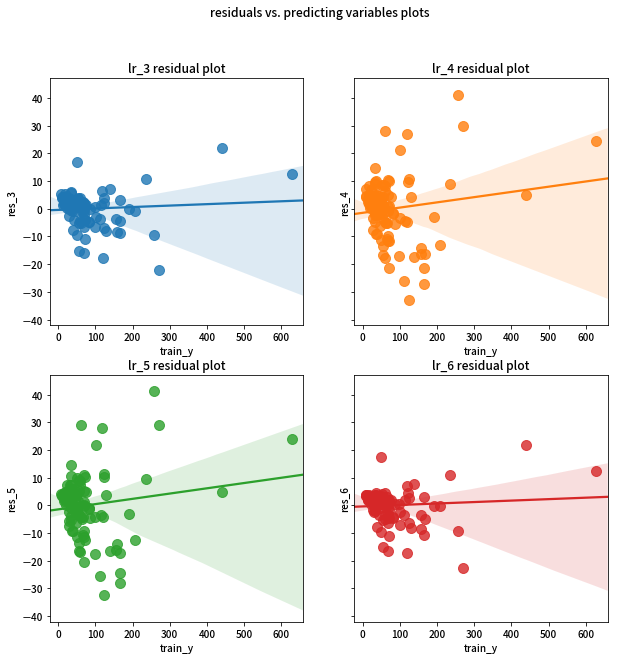

In [339]:
fig, axes = plt.subplots(2, 2, figsize =(10, 10), sharey = True)
fig.suptitle('residuals vs. predicting variables plots')

sn.regplot(ax = axes[0, 0],
           x = 'train_y', y = 'res_3',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[0,0].set_title('lr_3 residual plot')

sn.regplot(ax = axes[0,1],
           x = 'train_y', y = 'res_4',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[0,1].set_title('lr_4 residual plot')

sn.regplot(ax = axes[1,0],
           x = 'train_y', y = 'res_5',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[1,0].set_title('lr_5 residual plot')

sn.regplot(ax = axes[1,1],
           x = 'train_y', y = 'res_6',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[1,1].set_title('lr_6 residual plot')

## Fitted vs. residuals plot to check homoscedasticity

Text(0.5, 1.0, 'lr_6 residual plot')

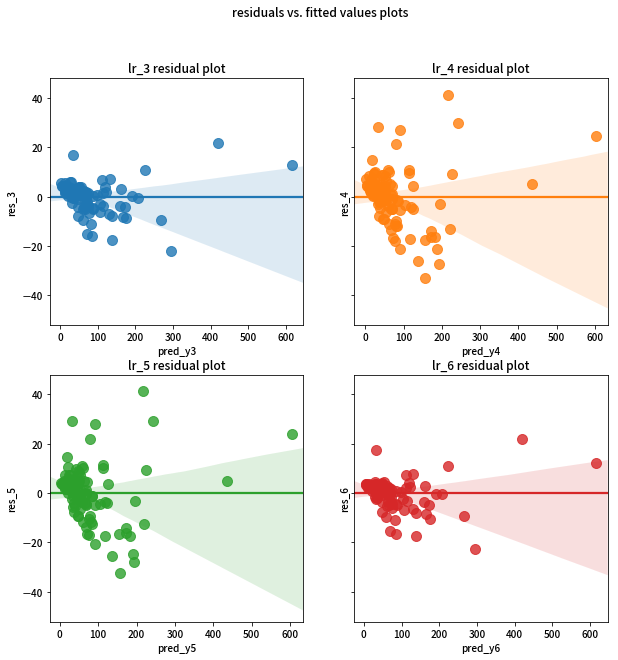

In [340]:
fig, axes = plt.subplots(2, 2, figsize =(10, 10), sharey = True)
fig.suptitle('residuals vs. fitted values plots')

sn.regplot(ax = axes[0, 0],
           x = 'pred_y3', y = 'res_3',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[0,0].set_title('lr_3 residual plot')

sn.regplot(ax = axes[0,1],
           x = 'pred_y4', y = 'res_4',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[0,1].set_title('lr_4 residual plot')

sn.regplot(ax = axes[1,0],
           x = 'pred_y5', y = 'res_5',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[1,0].set_title('lr_5 residual plot')

sn.regplot(ax = axes[1,1],
           x = 'pred_y6', y = 'res_6',
           data = train_pred_df,
           scatter_kws = {'marker' : 'D', 's' : 100})
axes[1,1].set_title('lr_6 residual plot')